# Análisis Exploratorio de Datos

Objetivo del Análisis exploratorio de datos:
* Detectar errores en los datos
* Checar suposiciones
* Seleccionar los modelos apropiados para describir la informacion
* Encontrar relaciones entre los datos y variables
* Dar una revision y realizar un diagnostico de las relaciones entre las variables que podrian explicar el fenomeno y su resultado.

In [4]:
#Librerías para trabajar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math
import ggplot

In [5]:
#Librerías para mostrar datos
from IPython.display import Image
%matplotlib inline

In [37]:
#Cargamos los datos
df = pd.read_csv("train.csv")

### Primer Paso: Explorar el contenido de los datos, y determinar su naturaleza

In [7]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


```
VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.
```

In [8]:
Image(url='http://figures.boundless.com/18394/full/penelement-fieldelemformat-gif.gif')

###¿Qué tipos de variables tenemos en nuestro dataset?

- PassengerId:
- Survived: 
- Pclass: 
- Name:
- Sex: 
- Age:
- SibSp:
- Parch:
- Ticket: 
- Fare:
- Cabin:
- Embarked:

###Existen 2 tipos de análisis exploratorio
* Univariable: Encontrar el comportamiento de una sola variable en el dataset
* Multivariable: Encontrar el comportamiento de dos o más variables en el dataset.

Éstos análisis, pueden ser de dos tipos, numéricos y gráficos.

#Análisis Univariable
**Variables categoricas**: El mejor análisis numérico es obtener el conteo de incidencias de una variable

In [46]:
df["Sex"].value_counts()

male      577
female    314
dtype: int64

**Variables numéricas**: La medición de la centralidad, desviación, la distancia entre cuartiles, nos pueden dar información importante para hacer evaluación de la distribución de la variable usando la muestra observada.

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


La curtosis y el sezgo son también medidas importantes para medir el comportamiento de una variable: 
   * **Curtosis:** Que tan hacia la cola tiende la distribución
   *  **Sezgo:** Que tanta falta de simetría tiene la distribución.

In [50]:
Image(url="http://www.janzengroup.net/stats/images/skewkurt.JPG")

skewness: 4.78731651967
kurtosis: 33.3981408809


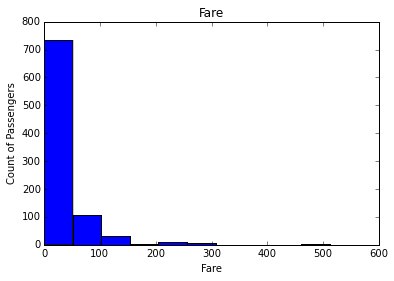

In [57]:
print("skewness:", df["Fare"].skew())
print("kurtosis:", df["Fare"].kurtosis()) 
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.linspace(df['Fare'].min(),df['Fare'].max(),1)
ax.hist(df['Fare'], bins = 10, range = (df['Fare'].min(),df['Fare'].max()))
plt.title('Fare')
plt.xlabel('Fare')
plt.ylabel('Count of Passengers')
plt.show()

skewness: 0.389107782301
kurtosis: 0.178274153642


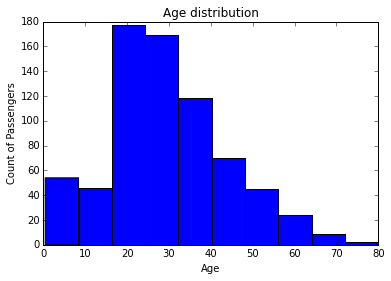

In [59]:
print("skewness:", df["Age"].skew())
print("kurtosis:", df["Age"].kurtosis()) 
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.linspace(df['Age'].min(),df['Age'].max(),1)
ax.hist(df['Age'], bins = 10, range = (df['Age'].min(),df['Age'].max()))
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Count of Passengers')
plt.show()

En lo gráfico, también otras herramientas nos pueden servir para identificar patrones: Como los Boxplots

/usr/local/lib/python3.4/site-packages/pandas/tools/plotting.py:2633: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  warnings.warn(msg, FutureWarning)


{'boxes': [<matplotlib.lines.Line2D at 0x107e856a0>],
 'caps': [<matplotlib.lines.Line2D at 0x108534a20>,
 'fliers': [<matplotlib.lines.Line2D at 0x10853f0b8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x107e854a8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x107e85a20>,
  <matplotlib.lines.Line2D at 0x108534278>]}

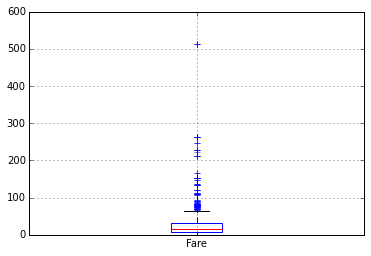

In [14]:
df.boxplot(column='Fare')

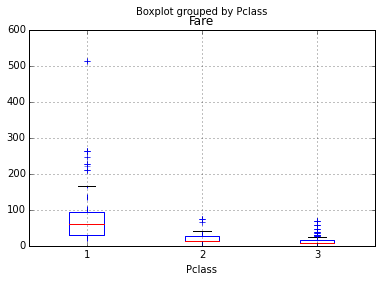

In [15]:
df.boxplot(column='Fare', by = 'Pclass')

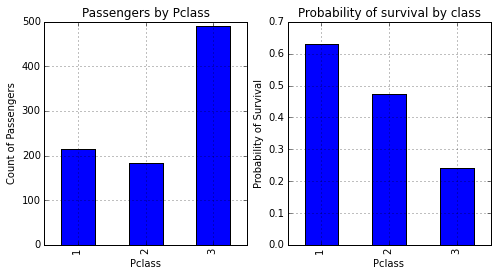

In [36]:
#Agrupamos el conteo de sobrevivencia
temp1 = df.groupby('Pclass').Survived.count()
temp2 = df.groupby('Pclass').Survived.sum()/df.groupby('Pclass').Survived.count()
fig = plt.figure(figsize=(8,4))
#Agregamos el grafico usando matplotlib, desde pandas.
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Pclass')
ax1.set_ylabel('Count of Passengers')
ax1.set_title("Passengers by Pclass")
temp1.plot(kind='bar')


ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Pclass')
ax2.set_ylabel('Probability of Survival')
ax2.set_title("Probability of survival by class")

#Análisis Multivariable

La Tabulación cruzada es la mejor herramienta no gráfica para explorar datos:

In [98]:
pd.crosstab([df.Pclass, df.Sex], df.Survived.astype(bool))

Survived       False  True 
Pclass Sex                 
1      female      3     91
       male       77     45
2      female      6     70
       male       91     17
3      female     72     72
       male      300     47

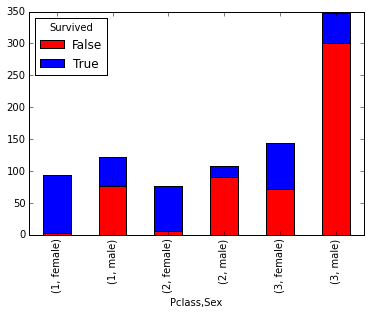

In [17]:
temp3 = pd.crosstab([df.Pclass, df.Sex], df.Survived.astype(bool))
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [99]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


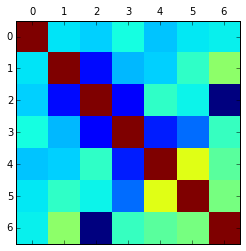

In [31]:
plt.matshow(df.corr())

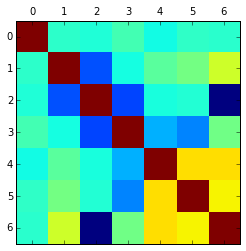

In [19]:
plt.matshow(df.corr(method='spearman'))

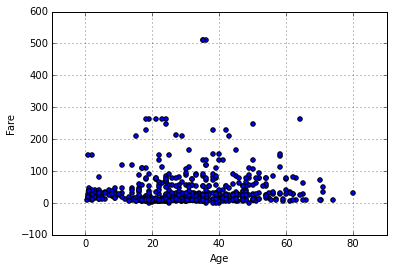

In [102]:
df.plot(x="Age",y="Fare",kind="scatter")

##Palabra del día: HETEROSKEDASTICITY
https://www.google.com.mx/url?sa=t&rct=j&q=&esrc=s&source=web&cd=4&cad=rja&uact=8&ved=0ahUKEwiYn8vT_crLAhVhnIMKHQTFB4UQFggyMAM&url=http%3A%2F%2Fservicios.elpais.com%2Fdiccionarios%2Fingles-espanol%2Fheteroskedasticity&usg=AFQjCNH3-uTaUolvQSKMEs2fYia_Kg3WGA